# Analysis of algorithms and data structures (Francesco Bellezza)
Reference paper: Barry, Paul. "Generalized Catalan numbers, Hankel transforms and Somos-4 sequences.." Journal of Integer Sequences [electronic only] 13.7 (2010): Article ID 10.7.2, 16 p., electronic only-Article ID 10.7.2, 16 p., electronic only. <http://eudml.org/doc/227317>.

# Formula used in this section
Generating function for catalan numbers: $\frac{1-\sqrt{1-4x}}{2x}$.

We define also this equation: $$a_n =\begin{cases} 1 \quad n=0 \\ \alpha a_{n-1} + \beta \sum_{k=0}^{n-1}a_k a_{n-1-k} \quad n>0 \end{cases}$$

We could describe the generating function as:
$$ g(x) = \frac{1}{1-\alpha x}c\left(\frac{\beta x}{(1-\alpha x)^2}\right)$$

Notice if $\alpha = 0$ and $\beta=1$, we could generate catalan numbers

In [1]:
import sympy as sym
from sympy.abc import k, n
from sympy import symbols, Function, Sum, Eq, catalan, Symbol, sqrt, binomial
import math
from sympy import sqrt
import numpy as np

sym.init_printing(use_latex=True)
dim = 10
n, alpha, beta, gamma, x = symbols("n alpha beta gamma x")
c = Function("c")

# catalan numbers
c = (1 - sqrt(1 - 4 * x)) / (2 * x)
display("catalan generating function:", c)
gen_catalan = c.series(x, 0, dim)
display("catalan series:", gen_catalan)

# define the first general formula
a = Function("a")
piecewise1 = sym.Piecewise(
    (1, Eq(n, 0)),
    (alpha * a(n - 1) + beta * Sum(a(k) * a(n - 1 - k), (k, 0, n - 1)), n > 0),
)
exp1 = Eq(a(n), piecewise1)

# generate function for first expression
genexp1 = 1 / (1 - alpha * x) * c.subs(x, (beta * x) / (1 - alpha * x) ** 2)
genexp1_series = genexp1.series(x, 0, dim)

display("series for first expression:", genexp1_series)

'catalan generating function:'

'catalan series:'

'series for first expression:'

# Creating a function to calculate recurrence of the definition of many equations
We write a function that allows us to calcolate the value of an expression, given ($n$, $\alpha$, $\beta$). (For example if we like to calculate the 10th catalan number, we could use the previous formula with ($n=10$, $\alpha=0$, $\beta=1$)).
$$a_n =\begin{cases} 1 \quad n=0 \\  \sum_{k=0}^{n-1}a_k a_{n-1-k} \quad n>0 \end{cases}$$
For a single value we check if catalan number calculate by the definition is the same as $a_n$ definition.

In [2]:
num = 10

# create a function to calculate this recurrency function...


def calculate_values(exp, num, val):
    # C4 is the 5th element of the sequence for example
    num = num + 1
    subst = {a(0): 1}
    values = val
    for i in range(1, num):
        values[n] = i
        subequation = exp.evalf(subs=values).doit()
        result = subequation.subs(subst).rhs
        subst[a(i)] = result
    return subst[a(num - 1)].simplify()


# comparing with catalan for num = 10

print(
    "Print True if two expressions returns the same value for num = 10 \t",
    calculate_values(exp1, num, {alpha: 0, beta: 1}) == catalan(num),
)
print("Value of num=10 \t", calculate_values(exp1, num, val={alpha: 0, beta: 1}))

Print True if two expressions returns the same value for num = 10 	 True
Value of num=10 	 16796


# Alternative forms for $a_n$ with $\alpha$ and $\beta$ 
We could write $a_n$ in this way: $\sum_{k=0}^{n} {{n+k}\choose {2k}} C_k \alpha ^{n-k}\beta^{k}$

In [3]:
# See equality for num = 6
num = 6
exp_alternative = Sum(
    binomial(n + k, 2 * k) * catalan(k) * alpha ** (n - k) * beta**k, (k, 0, n)
)
eq_alternative = Eq(a(n), exp_alternative)
display("Alternative expression value:", calculate_values(eq_alternative, num, {}))
display("Main expression value:", calculate_values(exp1, num, {}))

'Alternative expression value:'

'Main expression value:'

# Another way to write the first formula
We could see that $a_n = \left[ x^{n+1}\right] Rev \frac{x(1-\beta x)}{1+\alpha x} $

In [4]:
u = symbols("u")
# calculate the reverse function with solve method.
sol = sym.solve(u * (1 - beta * u) / (1 + alpha * u) - x, u)[0]
display("Inverse function of x(1-betax)/(1+alphax):", sol)
generative_function_rev = sol.series(x, 0, 5)
# check the fact that the n+1 coefficient of this series is equal to the n coefficient of the first series...
var1 = generative_function_rev.coeff(x, 4)
var2 = genexp1_series.coeff(x, 3)
display("Series with generating function with rev:", generative_function_rev)
display("4th coefficient for generating function with rev:", var1)
display("3th coefficient for exp1:", var2)
display("0 if the two precedent coefficients are equal:", sym.simplify(var1 - var2))

'Inverse function of x(1-betax)/(1+alphax):'

'Series with generating function with rev:'

'4th coefficient for generating function with rev:'

'3th coefficient for exp1:'

'0 if the two precedent coefficients are equal:'

We build a second expression: this one introduced a new variable. We could see that if we put $\alpha=1$ $\beta=0$ and $\gamma=1$ we obtain motzkin numbers.
$$ a(n) = \begin{cases} 1 \quad n=0 \\ \alpha \quad n=1 \\ \alpha a_{n-1} + \beta a_{n-2} + \gamma \sum_{k=0}^{n-2} a_k a_{n-2-k} \quad n>1 \end{cases}$$

In [5]:
# build second expression
piecewise2 = sym.Piecewise(
    (1, Eq(n, 0)),
    (alpha, Eq(n, 1)),
    (
        alpha * a(n - 1)
        + beta * a(n - 2)
        + gamma * Sum(a(k) * a(n - 2 - k), (k, 0, n - 2)),
        n > 1,
    ),
)
exp2 = Eq(a(n), piecewise2)

exp2

       ⎧                         1                            for n = 0
       ⎪                                                               
       ⎪                         α                            for n = 1
       ⎪                                                               
       ⎪                            n - 2                              
       ⎪                             ___                               
a(n) = ⎨                             ╲                                 
       ⎪                              ╲                                
       ⎪α⋅a(n - 1) + β⋅a(n - 2) + γ⋅  ╱   a(k)⋅a(-k + n - 2)  for n > 1
       ⎪                             ╱                                 
       ⎪                             ‾‾‾                               
       ⎪                            k = 0                              
       ⎩                                                               

# Catalan
We could see as before: $$a_n =\begin{cases} 1 \quad n=0 \\  \sum_{k=0}^{n-1}a_k a_{n-1-k} \quad n>0 \end{cases}$$
This equation describes catalan numbers.

In [6]:
# build catalan in another way
piecewise3 = sym.Piecewise(
    (1, Eq(n, 0)), (Sum(a(k) * a(n - 1 - k), (k, 0, n - 1)), n > 0)
)
exp3 = Eq(a(n), piecewise3)
exp3

       ⎧           1              for n = 0
       ⎪                                   
       ⎪n - 1                              
       ⎪ ___                               
       ⎪ ╲                                 
a(n) = ⎨  ╲                                
       ⎪  ╱   a(k)⋅a(-k + n - 1)  for n > 0
       ⎪ ╱                                 
       ⎪ ‾‾‾                               
       ⎪k = 0                              
       ⎩                                   

The catalan expression is equal to the first one with $\alpha=0$ and $\beta=1$... We prove it thanks to simplify.

In [7]:
# this expression is equal to the first one when alpha and beta are equal to zero and one respectively.
display(
    "0 if the two expression are equal:",
    sym.simplify((piecewise1 - piecewise3).evalf(subs={alpha: 0, beta: 1})),
)

'0 if the two expression are equal:'

# Motzkin numbers 
They describe how many different chords you could write between n points in a circle, without intersecting them. The expression for describing them is written below:

In [8]:
# motzkin numbers...
piecewisem = sym.Piecewise(
    (1, Eq(n, 0)),
    (1, Eq(n, 1)),
    (a(n - 1) + Sum(a(k) * a(n - 2 - k), (k, 0, n - 2)), n > 1),
)
expM = Eq(a(n), piecewisem)
expM

       ⎧                 1                   for n = 0 ∨ n = 1
       ⎪                                                      
       ⎪           n - 2                                      
       ⎪            ___                                       
       ⎪            ╲                                         
a(n) = ⎨             ╲                                        
       ⎪a(n - 1) +   ╱   a(k)⋅a(-k + n - 2)      for n > 1    
       ⎪            ╱                                         
       ⎪            ‾‾‾                                       
       ⎪           k = 0                                      
       ⎩                                                      

We check the equivalence of expression with gamma with motzkin numbers, as we said before.


In [9]:
# check formula for alpha=1, beta=0, gamma=1
sym.simplify((piecewise2 - piecewisem).evalf(subs={alpha: 1, beta: 0, gamma: 1}))

# Motzkin numbers generating function
We write explicitly the formula of generating function of motzkin numbers. Than, we use it to build a sympy series. We notice that every term coefficient describe the corrispondent motzkin number!

'motzkin generating function:'

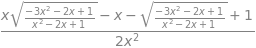

'motzkin series:'

In [10]:
g = Function("g")
# described as (5)
m = sym.together(sym.expand((1 / (1 - x)) * c.subs(x, (x**2) / ((1 - x) ** 2))))
display("motzkin generating function:", m)
# generate function for m expression
gen_exp_m = m.series(x, 0, dim)
display("motzkin series:", gen_exp_m)

We try to demonstrate that the Motzkin formula is equal to the formula that we obtained by solving:
$ G(x) = 1 + x G(x) + x^2 G(x)^2$

During solving we make the assumption that 1-x is a positive quantity to simplify square roots.

'exp to solve:'

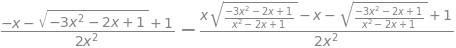

'results after collect the term: (-3x^2-2x+1)/(x^2-2x+1)'

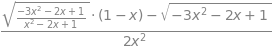

'0 if (1-x)^2=x^2-2x+1:'

'substitute x^2-2x+1 with (1-x)^2;'

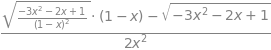

'substitute 1-x with sqrt((1-x)**2):'

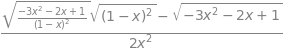

'sqrt(x/y) = sqrt(x)/sqrt(y) logic applied: we obtained zero as wished'

In [11]:
# solve generative equation
g_x = Symbol("g_x")
eqg = Eq(1 + x * g_x + x**2 * g_x**2 - g_x, 0)
# make the formula looks like pdf one
exp_fin_g = sym.together(sym.expand(sym.solve(eqg, g_x)[0]))

diff_exp = exp_fin_g - m
display("exp to solve:", diff_exp)

intermiedate_result = sym.simplify(
    sym.collect(diff_exp, sqrt((-3 * x**2 - 2 * x + 1) / (x**2 - 2 * x + 1)))
)
display("results after collect the term: (-3x^2-2x+1)/(x^2-2x+1)", intermiedate_result)
# remember this equality... we could do:
equality1 = sym.simplify(x**2 - x * 2 + 1 - (1 - x) ** 2)
display("0 if (1-x)^2=x^2-2x+1:", equality1)
# after some manipolations, I obtained the desired result...

# substitute x^2-2x+1 with (1-x)^2
int2 = intermiedate_result.subs(x**2 - x * 2 + 1, (1 - x) ** 2)
display("substitute x^2-2x+1 with (1-x)^2;", int2)
# substitute 1-x with sqrt((1-x)**2) -> we exclude negatives 1-x values...
int3 = int2.subs((1 - x), sqrt((1 - x) ** 2))
display("substitute 1-x with sqrt((1-x)**2):", int3)
# divide the sqrt root sqrt(x/y) in sqrt(x)/sqrt(y)
int4 = int3.subs(
    sqrt((-3 * x**2 - 2 * x + 1) / (1 - x) ** 2),
    sqrt(-3 * x**2 - 2 * x + 1) / sqrt((1 - x) ** 2),
)
display("sqrt(x/y) = sqrt(x)/sqrt(y) logic applied: we obtained zero as wished", int4)

In [12]:
# display the m series found by solving generating function...
seriem = exp_fin_g.series(x, 0, dim)
display("series obtained solving generating function:", seriem)
# the coefficients = motzkin numbers in this case too!

'series obtained solving generating function:'

We write a way to express motzkin numbers with a continuos fraction: for writing this formula we should use the fact that catalan numbers could expressed as a continuos fraction: $c(x)= \frac{1}{1-\frac{x}{1-\frac{x}{1-\frac{x}{1-...}}}}$

Sympy tutorial offers a way to write a continuos function, but we have to stop a certain point. We couldn't define a continuos fraction in a different easy way.

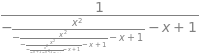

In [13]:
# define continuos fractions for motzkin numbers... (help from sympy tutorial)
dots = symbols("1-...")


def list_to_frac(l):
    expr = dots
    for i in reversed(l[1:]):
        expr = i - (x**2 / expr)
    return l[0] / expr


list_to_frac([1, 1 - x, 1 - x, 1 - x, 1 - x, 1 - x])

We check the fact that $$ m(x) = \frac{1}{1-x-x^2m(x)}$$ Where m(x) returns the xth motzkin number.

'Describing this equality (m = 1/(1-x-x**2*m)):'

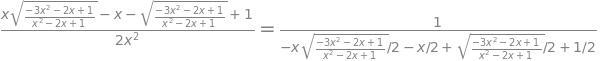

'0 if equality holds:'

In [14]:
# check the truth of equivalence m = 1/(1-x-x**2*m)
display("Describing this equality (m = 1/(1-x-x**2*m)):", Eq(m, 1 / (1 - x - x**2 * m)))
display("0 if equality holds:", sym.simplify(m - 1 / (1 - x - x**2 * m)))

# A128720 sequence for gamma expression with $\alpha=\beta=\gamma=1$
This is the sequence describing the number of paths in the first quadrant from (0,0) to (n,0) using steps U=(1,1), D=(1,-1), h=(1,0), H=(2,0)
https://oeis.org/A128720
$gen = \frac{1}{(1 - x^2)} m(\frac{x}{(1 - x^2)})$


In [15]:
# gamma generating function with motzkin numbers...

gen_gamma1 = 1 / (1 - x**2) * m.subs(x, x / (1 - x**2))
gamma_series1 = gen_gamma1.series(x, 0, dim)
display("Gamma series with alpha=beta=gamma=1:", gamma_series1)

'Gamma series with alpha=beta=gamma=1:'

For $\alpha=\beta=\gamma=1$ we could see that this formula holds:
$$ a_n = \sum_{k=0}^{\lfloor n/2 \rfloor}{{n-k}\choose{k}}M_{n-2k}$$

In [16]:
def alternative_formula_abg1(n):
    return sum(
        [
            binomial(n - k, k) * gen_exp_m.coeff(x, n - 2 * k)
            for k in range(math.floor(n / 2) + 1)
        ]
    )


[alternative_formula_abg1(k) for k in range(dim)]

# Formula deducing the Stieltjes transform
$$\frac{1}{1-x-x^2}c\bigg(\frac{x^2}{(1-x-x^2)^2}\bigg)= \frac{1-x-x^2-\sqrt{(1-2x-5x^2+2x^3+x^4)}}{2x^2}$$


In [17]:
formula_deducing_stieltjes = 1 / (1 - x - x**2) * c.subs(x, x**2 / (1 - x - x**2) ** 2)
formula_obtained = (
    1 - x - x**2 - sym.sqrt(1 - 2 * x - 5 * x**2 + 2 * x**3 + x**4)
) / (2 * x**2)

series1st = formula_deducing_stieltjes.series(x, 0, dim)
series2st = formula_obtained.series(x, 0, dim)

display("series with catalan:", series1st)
display("series for stieltjes transform:", series2st)

'series with catalan:'

'series for stieltjes transform:'

We could write the gamma function thanks to Stieltjes transform:
$a_n = \frac{1}{\pi}  \int\limits_{\frac{\sqrt{5}}{2}-\frac{1}{2}}^{\frac{3}{2}+\frac{\sqrt{13}}{2}} x^n \frac{\sqrt{-1-2x+5x^2+2x^3-x^4}}{2x}, dx - \frac{1}{\pi}  \int\limits_{\frac{-\sqrt{5}}{2}-\frac{1}{2}}^{\frac{3}{2}-\frac{\sqrt{13}}{2}} x^n \frac{\sqrt{-1-2x+5x^2+2x^3-x^4}}{2x}, dx$

In [18]:
function = x**n * sym.sqrt(-1 - 2 * x + 5 * x**2 + 2 * x**3 - x**4) / (2 * x)
left_part = (
    1
    / math.pi
    * sym.integrate(
        function, (x, (sym.sqrt(5)) / 2 - (1 / 2),(3 / 2) + (sym.sqrt(13)) / 2)
    ).evalf()
)
right_part = (
    -1
    / math.pi
    * sym.integrate(
        function, (x, (-sym.sqrt(5)) / 2 - (1 / 2),(3 / 2) - (sym.sqrt(13)) / 2)
    ).evalf()
)
a_n_gamma_stieltjes = left_part + right_part
display("Values of alpha=beta=gamma=1 expressions using integral transform:")
[a_n_gamma_stieltjes.evalf(subs={n: i}) for i in range(dim)]

'Values of alpha=beta=gamma=1 expressions using integral transform:'

We could write a more general sequence with $\alpha$ and $\beta$ and $\gamma$.
$$\frac{1}{1-\alpha x - \beta x^2} c(\frac{\gamma x^2}{(1-\alpha x - \beta x ^2)})$$

In [19]:
# same function with alpha and beta values
exp1_gamma = 1 / (1 - alpha * x - beta * x**2)

exp2_gamma = gamma * x**2 / (1 - alpha * x - beta * x**2) ** 2

gen_gamma = exp1_gamma * c.subs(x, exp2_gamma)

gamma_series = gen_gamma.series(x, 0, dim)
display("general gamma series:", gamma_series)

'general gamma series:'

We try to calculate general term of the stretched Riordan Array for gamma function:
$$\sum_{j=0}^{n-2k} {{2k+j}\choose{j}} {{j}\choose{n-2k-j}} \alpha^{2k+2j-n} \beta^{n-2k-j} \gamma^k $$

In [20]:
def calculate_gamma(n):
    return np.sum(
        [
            binomial(2 * k + j, j)
            * binomial(j, n - 2 * k - j)
            * alpha ** (2 * k + 2 * j - n)
            * beta ** (n - 2 * k - j)
            * gamma**k
            * catalan(k)
            for k in range(math.floor(n / 2) + 1)
            for j in range(n - 2 * k + 1)
        ]
    )


display("second coefficient value calculated by formula:", calculate_gamma(2))
value = sym.simplify(calculate_gamma(2) - gamma_series.coeff(x, 2))
display("0 if second coefficient = second coefficient with formula:", value)

'second coefficient value calculated by formula:'

'0 if second coefficient = second coefficient with formula:'

# Riordan Arrays
Riordan arrays are an interesting way to combine two different generating function to generate a matrix. We define: $g(x) = 1+g_1x+g_2x^2+...$ and $f(x) = f_1x+f_2x^2+...$ We define the i-th column of the matrix equal to $g(x)f(x)^i$ (i starting from zero).

In [21]:
# building Riordan Array...
def riordan_array(s1, s2, dim):
    start = []
    for i in range(0, dim):
        exp = sym.expand(s1 * ((s2) ** i))
        prov = [(exp).coeff(x, j) for j in range(dim)]
        start.append(prov)
    final = np.column_stack(start)
    return sym.Matrix(final)

# Riordan Arrays equations
We want to describe this equation:
$$a_n =\begin{cases} 1 \quad n=0 \\ \alpha a_{n-1} + \beta \sum_{k=0}^{n-1}a_k a_{n-1-k} \quad n>0 \end{cases}$$
As Riordan Array $$ \bigg(\frac{1}{1-\alpha x} , \frac{\beta x}{(1- \alpha x)^2} \bigg) \cdot c(x)$$

In [22]:
seriealpha = (1 / (1 - alpha * x)).series(x, 0, dim)
seriebeta = (beta * x / ((1 - alpha * x) ** 2)).series(x, 0, dim)
display("alpha series:", seriealpha)
display("beta series:", seriebeta)
first_riordan = riordan_array(seriealpha, seriebeta, dim)
catalan_numbers = [catalan(i) for i in range(dim)]
first_riordan = first_riordan * np.diag(catalan_numbers)
display("riordan matrix obtained with alpha and beta series:")
first_riordan

'alpha series:'

'beta series:'

'riordan matrix obtained with alpha and beta series:'

⎡1      0         0          0            0            0            0         
⎢                                                                             
⎢α      β         0          0            0            0            0         
⎢                                                                             
⎢ 2                2                                                          
⎢α    3⋅α⋅β     2⋅β          0            0            0            0         
⎢                                                                             
⎢ 3     2            2         3                                              
⎢α   6⋅α ⋅β    10⋅α⋅β       5⋅β           0            0            0         
⎢                                                                             
⎢ 4      3        2  2          3           4                                 
⎢α   10⋅α ⋅β  30⋅α ⋅β     35⋅α⋅β        14⋅β           0            0         
⎢                                                   

# Hankel transform
The Hankel transform is defined in this way:
$ h_n = | a_{i+j} |_{i,j=0}^n $ where $A =\{a_0,a_1,a_2,...\}$  is a sequence.
We know that if a formula could be written as continued fraction, we could find a Hankel transform.

For this equation:
$$a_n =\begin{cases} 1 \quad n=0 \\ \alpha a_{n-1} + \beta \sum_{k=0}^{n-1}a_k a_{n-1-k} \quad n>0 \end{cases}$$

We have this Hankel transform:
$$ (\beta (\alpha + \beta))^{{n+1}\choose{2}}$$


In [23]:
def hankel_matrix(sequence):
    k = math.floor(len(sequence) / 2)
    matrix = sym.zeros(k, k)
    for i in range(k):
        for j in range(k):
            matrix[i, j] = sequence[i + j]
    return matrix


def get_elements(series, dim):
    series = sym.expand(series)
    return [series.coeff(x, i) for i in range(dim)]


elements_first = get_elements(genexp1_series, dim)
matrix = hankel_matrix(elements_first)
display("hankel matrix:", matrix)
display("determinant of precedent matrix:", matrix.det())

hankel = (beta * (alpha + beta)) ** binomial(n + 1, 2)
display("hankel values:", hankel.evalf(subs={n: math.floor(dim / 2) - 1}).expand())

'hankel matrix:'

⎡                                                                             
⎢                    1                                              α + β     
⎢                                                                             
⎢                                                              2              
⎢                  α + β                                      α  + 3⋅α⋅β + 2⋅β
⎢                                                                             
⎢             2              2                            3      2           2
⎢            α  + 3⋅α⋅β + 2⋅β                            α  + 6⋅α ⋅β + 10⋅α⋅β 
⎢                                                                             
⎢       3      2           2      3                4       3         2  2     
⎢      α  + 6⋅α ⋅β + 10⋅α⋅β  + 5⋅β                α  + 10⋅α ⋅β + 30⋅α ⋅β  + 35
⎢                                                                             
⎢ 4       3         2  2         3       4   5      

'determinant of precedent matrix:'

'hankel values:'

# Somos 4-sequence
A somo 4-sequence is a sequence that contains (r,s) integers such that:
$$ t_nt_{n-4} = rt_{n-1}t_{n-3}+st_{n-2}^2 \quad n \ge 4$$

For the last hankel transform we check that:
$(\beta^3 (\alpha + \beta)^3,0)$, $(0, \beta^4(\alpha + \beta)^4)$ are (r,s) integer for Somos-4 sequence

In [24]:
hankel_values = [hankel.evalf(subs={n: i}) for i in range(dim)]


def check_somo_4_sequence(r, s, t):
    for i in range(4, len(t)):
        left_exp = t[i] * t[i - 4]
        right_exp = r * t[i - 1] * t[i - 3] + s * t[i - 2] ** 2
        if sym.simplify(left_exp - right_exp) != 0:
            return False
    return True


display(
    "True if it is a somo-4 sequence: (beta ** 3 *(alpha + beta)**3 ,0)",
    check_somo_4_sequence(beta**3 * (alpha + beta) ** 3, 0, hankel_values),
)
display(
    "True if it is a somo-4 sequence: (0,beta ** 4 *(alpha + beta)**4)",
    check_somo_4_sequence(0, beta**4 * (alpha + beta) ** 4, hankel_values),
)

'True if it is a somo-4 sequence: (beta ** 3 *(alpha + beta)**3 ,0)'

True

'True if it is a somo-4 sequence: (0,beta ** 4 *(alpha + beta)**4)'

True

Now we check the hankel transform if it is a (1,3) somos-4 sequence for $\alpha=\beta=\gamma=1$

In [25]:
dim = 20
gamma_series1 = gen_gamma1.series(x, 0, dim)
elements_gamma1 = get_elements(gamma_series1, dim)
matrix_gamma1_hank = hankel_matrix(elements_gamma1)


def hankel_values(matrix):
    k = matrix.shape[0]
    seq = []
    for z in range(1, k):
        app_matrix = sym.zeros(z, z)
        for i in range(z):
            for j in range(z):
                app_matrix[i, j] = matrix[i, j]
        seq.append(app_matrix.det())
    return seq


hankel_values_el = hankel_values(matrix_gamma1_hank)
display("hankel with alpha=beta=gamma=1:", hankel_values_el)
display(
    "check if the previous hankel transform is a (1,3) somos-4-sequence",
    check_somo_4_sequence(1, 3, hankel_values_el),
)

'hankel with alpha=beta=gamma=1:'

'check if the previous hankel transform is a (1,3) somos-4-sequence'

True

Check the Hankel transform of gamma function. It satisfies $ \big( \alpha^2 \gamma^2, \gamma^2 + \gamma (2 \beta - \alpha^2 ) + \beta^2 \big)$ somos 4-sequence.

In [26]:
dim = 10
elements_gamma = get_elements(gamma_series, dim)
matrix_gamma_hank = hankel_matrix(elements_gamma)
display("hankel matrix general gamma function:", matrix_gamma_hank)
hankel_values_gamma = hankel_values(matrix_gamma_hank)
display("hankel values:", hankel_values_gamma)
display(
    "True if it is a (alpha**2*gamma**2,gamma**2*(gamma**2+gamma*(2*beta-alpha**2)+ beta**2) somos-4 sequence",
    check_somo_4_sequence(
        alpha**2 * gamma**2,
        gamma**2 * (gamma**2 + gamma * (2 * beta - alpha**2) + beta**2),
        hankel_values_gamma,
    ),
)

'hankel matrix general gamma function:'

⎡                                                                             
⎢                   1                                               α         
⎢                                                                             
⎢                                                               2             
⎢                   α                                          α  + β + γ     
⎢                                                                             
⎢                2                                          3                 
⎢               α  + β + γ                                 α  + 2⋅α⋅β + 3⋅α⋅γ 
⎢                                                                             
⎢            3                                   4      2        2      2     
⎢           α  + 2⋅α⋅β + 3⋅α⋅γ                  α  + 3⋅α ⋅β + 6⋅α ⋅γ + β  + 3⋅
⎢                                                                             
⎢ 4      2        2      2              2   5      3

'hankel values:'

'True if it is a (alpha**2*gamma**2,gamma**2*(gamma**2+gamma*(2*beta-alpha**2)+ beta**2) somos-4 sequence'

True

# Hankel transform for gamma function with $\beta=0$
$$h_n = \gamma^ {{n+1}\choose{2}}$$

In [27]:
hankel_b0 = gamma ** binomial(n + 1, 2)
gamma_series_b0 = gamma_series.subs(beta, 0)
display(gamma_series_b0)
values_series_b0 = [gamma_series_b0.coeff(x, i) for i in range(dim)]
hankel_matrix_b0 = hankel_matrix(values_series_b0)
display(hankel_matrix_b0)
display(hankel_values(hankel_matrix_b0))
display([hankel_b0.subs(n, i) for i in range(dim)])

⎡                                                                             
⎢                                                                             
⎢                        1                                                    
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                            2
⎢                        α                                              - 2⋅α 
⎢                                                                             
⎢                                                                             
⎢                         2        2                                ⎛   2     
⎢                  2   6⋅α ⋅γ + 2⋅γ                               α⋅⎝6⋅α ⋅γ + 
⎢             - 2⋅α  + ─────────────                

We could write $a_n= [ x^{n+1} ] Rev \frac{x}{1+\alpha x + \gamma x^2}$ with $\beta=0$

'generating function founded:'

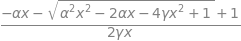

'n+1 (5) term of the series defined by previous gen function:'

'n (4) term of the generating function defined with beta=0'

'0 if the two terms are equal:'

In [28]:
w = sym.symbols("w")
# calculate the inverse function
w = sym.solve(w / (1 + alpha * w + gamma * w**2) - x, w)[0]
display("generating function founded:", w)

w_serie = w.series(x, 0, dim)

number = 4
w1 = w_serie.coeff(x, number + 1)
display("n+1 (5) term of the series defined by previous gen function:", w1)
w2 = gamma_series_b0.coeff(x, number)
display("n (4) term of the generating function defined with beta=0", w2)
display("0 if the two terms are equal:", sym.simplify(w1 - w2))

# If $\alpha=0$ we could see that:
$$a_n = \sum_{k=0}^{\lfloor n/2 \rfloor} {{\frac{n+2k}{2}}\choose{2k}} \frac{1 + (-1)^{n-2k}}{2}\beta^{\frac{n-2k}{2}}\gamma^k C_k$$

In [29]:
gamma_series_a0 = gamma_series.subs(alpha, 0)
number = 6


def an_a0(n):
    return np.sum([
        binomial(int((n + 2 * k) / 2), 2 * k)
        * int((1 + (-1) ** (n - 2 * k)))
        / 2
        * beta ** int((n - 2 * k) / 2)
        * gamma**k
        * catalan(k)
        for k in range(math.floor(n / 2) + 1)
        ]
    )

display("serie with alpha = 0:",gamma_series_a0)
v_gammaa0 = gamma_series_a0.coeff(x, number).simplify()
display("coefficient from series:", v_gammaa0)
ana0_val = an_a0(number)
display("number obtained by definition:", ana0_val)
display("0 if coefficient number 6 of the two expressions is equal:",v_gammaa0-ana0_val)

'serie with alpha = 0:'

'coefficient from series:'

'number obtained by definition:'

'0 if coefficient number 6 of the two expressions is equal:'

# Special sequences for gamma function
https://oeis.org/A343773
$$\alpha = 1, \beta=0, \gamma=-1$$
The generating function is: $$ \frac{-1+x+\sqrt{1-2x+5x^2}}{2x^2}$$
The hankel transform of $a_{n}$ is: $$h_{n} = (-1)^{{n+1}\choose{2}} $$
It is a (1,2) somos-4 sequence.

In [30]:
h_10m1 = (-1) ** binomial(n + 1, 2)
h_10m1_val = [h_10m1.subs(n, i) for i in range(dim)]
formula_10m1 = (-1 + x + sym.sqrt(1 - 2 * x + 5 * x**2)) / (2 * x**2)
series_10m1 = formula_10m1.series(x, 0, dim)
display("serie defined by generating function:", series_10m1)
display(
    "gamma series using definition:",
    gamma_series.subs(alpha, 1).subs(beta, 0).subs(gamma, -1),
)
display("hankel_values:", h_10m1_val)
hankel_matrix10m1 = hankel_matrix([series_10m1.coeff(x, i) for i in range(0, dim)])
display("hankel_matrix:", hankel_matrix10m1)
check_somo_4_sequence(1, 2, h_10m1_val)

'serie defined by generating function:'

'gamma series using definition:'

'hankel_values:'

'hankel_matrix:'

⎡1   1   0   -2  -3 ⎤
⎢                   ⎥
⎢1   0   -2  -3   1 ⎥
⎢                   ⎥
⎢0   -2  -3  1   11 ⎥
⎢                   ⎥
⎢-2  -3  1   11  15 ⎥
⎢                   ⎥
⎣-3  1   11  15  -13⎦

True

In [31]:
dim = 16
r, s = sym.symbols("r s")
values_somos_to_check = [
    {alpha: 2, beta: -2, gamma: -1, r: 4, s: 13},
    {alpha: -1, beta: -2, gamma: -1, r: 1, s: 10},
    {alpha: -1, beta: 0, gamma: -1, r: 1, s: 2},
    {alpha: 1, beta: 2, gamma: -1, r: 1, s: 2},
    {alpha: 3, beta: -3, gamma: -1, r: 9, s: 25},
    {alpha: 3, beta: 3, gamma: 1, r: 9, s: 7},
    {alpha: -2, beta: -2, gamma: 1, r: 4, s: -3},
    {alpha: 1, beta: -1, gamma: 1, r: 1, s: -1},
    {alpha: 1, beta: 1, gamma: -1, r: 1, s: 1},
    {alpha: 1, beta: 3, gamma: -1, r: 1, s: 5},
    {alpha: 1, beta: 2, gamma: -2, r: 4, s: 8},
    {alpha: 1, beta: 0, gamma: 2, r: 4, s: 8},
    {alpha: 1, beta: 2, gamma: 1, r: 1, s: 8},
    {alpha: -1, beta: -3, gamma: 1, r: 1, s: 3},
    {alpha: -1, beta: 1, gamma: 1, r: 1, s: 3},
    {alpha: 1, beta: -1, gamma: 1, r: 1, s: -1},
]

not_exit = True
for el in values_somos_to_check:
    al, be, gam, r, s = el.values()
    print("alpha = %d, beta = %d, gamma = %d, r = %d,s = %d" % (al,be,gam,r,s))
    new_gamma_series = gen_gamma.series(x,0,dim).subs([(alpha,al), (beta,be), (gamma,gam)])
    hankel_mat = hankel_matrix([new_gamma_series.coeff(x,i) for i in range(dim)])
    hankel_vals = hankel_values(hankel_mat)
    display(hankel_vals)
    not_exit = check_somo_4_sequence(r,s,hankel_vals) 
    if not not_exit:
        print("With these values of alpha = %d, beta = %d, gamma = %d, r = %d,s = %d: the somos-4 property is not verified" % (al,be,gam,r,s))
    else:
        print("The somos-4 property is verified")


alpha = 2, beta = -2, gamma = -1, r = 4,s = 13


The somos-4 property is verified
alpha = -1, beta = -2, gamma = -1, r = 1,s = 10


The somos-4 property is verified
alpha = -1, beta = 0, gamma = -1, r = 1,s = 2


The somos-4 property is verified
alpha = 1, beta = 2, gamma = -1, r = 1,s = 2


The somos-4 property is verified
alpha = 3, beta = -3, gamma = -1, r = 9,s = 25


The somos-4 property is verified
alpha = 3, beta = 3, gamma = 1, r = 9,s = 7


The somos-4 property is verified
alpha = -2, beta = -2, gamma = 1, r = 4,s = -3


The somos-4 property is verified
alpha = 1, beta = -1, gamma = 1, r = 1,s = -1


The somos-4 property is verified
alpha = 1, beta = 1, gamma = -1, r = 1,s = 1


The somos-4 property is verified
alpha = 1, beta = 3, gamma = -1, r = 1,s = 5


The somos-4 property is verified
alpha = 1, beta = 2, gamma = -2, r = 4,s = 8


The somos-4 property is verified
alpha = 1, beta = 0, gamma = 2, r = 4,s = 8


The somos-4 property is verified
alpha = 1, beta = 2, gamma = 1, r = 1,s = 8


The somos-4 property is verified
alpha = -1, beta = -3, gamma = 1, r = 1,s = 3


The somos-4 property is verified
alpha = -1, beta = 1, gamma = 1, r = 1,s = 3


The somos-4 property is verified
alpha = 1, beta = -1, gamma = 1, r = 1,s = -1


The somos-4 property is verified


# Alternative form of $a_n$

$$a_n =\begin{cases} 1 \quad n=0 \\ \alpha a_{n-1} + \beta \sum_{0}^{n-1}a_k a_{n-1-k} \quad n>0 \end{cases}$$
As Riordan Array $$ \bigg(\frac{1}{1-\alpha x} , \frac{\beta x}{(1- \alpha x)^2} \bigg) \cdot c(x)$$
$a_n=\sum_{k=0}^{n} {{n+k}\choose{2k}} C_k \alpha^{n-k} \beta^{k}$

If we write the previous matrix with these terms, we obtained the matrix = riordan array:

In [32]:
# If we use the definition, we could notice that the two matrixes are the same!
dim = 10
def gen_matrix_alpha(n):
    matrix = sym.zeros(n, n)
    for i in range(n):
        for j in range(i + 1):
            matrix[i, j] = (
                binomial(i + j, 2 * j) * catalan(j) * alpha ** (i - j) * beta**j
            )
    return matrix


gen_matrix_alpha(dim)

⎡1      0         0          0            0            0            0         
⎢                                                                             
⎢α      β         0          0            0            0            0         
⎢                                                                             
⎢ 2                2                                                          
⎢α    3⋅α⋅β     2⋅β          0            0            0            0         
⎢                                                                             
⎢ 3     2            2         3                                              
⎢α   6⋅α ⋅β    10⋅α⋅β       5⋅β           0            0            0         
⎢                                                                             
⎢ 4      3        2  2          3           4                                 
⎢α   10⋅α ⋅β  30⋅α ⋅β     35⋅α⋅β        14⋅β           0            0         
⎢                                                   

# Some interesting Riordan Matrixes
Using $g(x)=\frac{1}{1-x}$ and $f(x)=\frac{x}{1-x}$ we obtain the pascal triangle! The sum of the diagonal element is equal to fibonacci numbers!

In [33]:
# I obtain Pascal Triangle!
g1 = 1 / (1 - x)
serie1 = g1.series(x, 0, dim)
display(serie1)
g2 = x / (1 - x)
serie2 = g2.series(x, 0, dim)
display(serie2)
matrix_pascal = riordan_array(serie1, serie2, dim)
display(matrix_pascal)

⎡1  0  0   0    0    0   0   0   0  0⎤
⎢                                    ⎥
⎢1  1  0   0    0    0   0   0   0  0⎥
⎢                                    ⎥
⎢1  2  1   0    0    0   0   0   0  0⎥
⎢                                    ⎥
⎢1  3  3   1    0    0   0   0   0  0⎥
⎢                                    ⎥
⎢1  4  6   4    1    0   0   0   0  0⎥
⎢                                    ⎥
⎢1  5  10  10   5    1   0   0   0  0⎥
⎢                                    ⎥
⎢1  6  15  20  15    6   1   0   0  0⎥
⎢                                    ⎥
⎢1  7  21  35  35   21   7   1   0  0⎥
⎢                                    ⎥
⎢1  8  28  56  70   56   28  8   1  0⎥
⎢                                    ⎥
⎣1  9  36  84  126  126  84  36  9  1⎦

# Binomial matrix $B^m$
We build $$B^m = \bigg( \frac{1}{1-mx} , \frac{x}{1-mx}\bigg)$$

We could see that the inverse $B^{-m}$ is given by:
$\bigg( \frac{1}{1+mx} , \frac{x}{1+mx}\bigg) $

In [34]:
# check generalization with m=v
v = sym.symbols("v")

g4 = 1 / (1 - v * x)
g5 = x / (1 - v * x)

g41 = 1 / (1 + v * x)
g51 = x / (1 + v * x)


serie41 = g41.series(x, 0, dim)
serie51 = g51.series(x, 0, dim)

riord1 = riordan_array(serie41, serie51, dim)
display(riord1)


serie4 = g4.series(x, 0, dim)
serie5 = g5.series(x, 0, dim)

display(serie4)
display(serie5)

riord2 = riordan_array(serie4, serie5, dim)
display(riord2)
display("check if the matrix1*matrix2 = Identity matrix:", riord1 * riord2)

⎡ 1     0      0       0        0       0       0       0     0    0⎤
⎢                                                                   ⎥
⎢-v     1      0       0        0       0       0       0     0    0⎥
⎢                                                                   ⎥
⎢ 2                                                                 ⎥
⎢v    -2⋅v     1       0        0       0       0       0     0    0⎥
⎢                                                                   ⎥
⎢  3     2                                                          ⎥
⎢-v   3⋅v     -3⋅v     1        0       0       0       0     0    0⎥
⎢                                                                   ⎥
⎢ 4       3      2                                                  ⎥
⎢v    -4⋅v    6⋅v     -4⋅v      1       0       0       0     0    0⎥
⎢                                                                   ⎥
⎢  5     4        3      2                                          ⎥
⎢-v   5⋅v    -10⋅v  

⎡1    0      0      0      0       0       0      0     0   0⎤
⎢                                                            ⎥
⎢v    1      0      0      0       0       0      0     0   0⎥
⎢                                                            ⎥
⎢ 2                                                          ⎥
⎢v   2⋅v     1      0      0       0       0      0     0   0⎥
⎢                                                            ⎥
⎢ 3     2                                                    ⎥
⎢v   3⋅v    3⋅v     1      0       0       0      0     0   0⎥
⎢                                                            ⎥
⎢ 4     3     2                                              ⎥
⎢v   4⋅v   6⋅v     4⋅v     1       0       0      0     0   0⎥
⎢                                                            ⎥
⎢ 5     4      3      2                                      ⎥
⎢v   5⋅v   10⋅v   10⋅v    5⋅v      1       0      0     0   0⎥
⎢                                                      

'check if the matrix1*matrix2 = Identity matrix:'

⎡1  0  0  0  0  0  0  0  0  0⎤
⎢                            ⎥
⎢0  1  0  0  0  0  0  0  0  0⎥
⎢                            ⎥
⎢0  0  1  0  0  0  0  0  0  0⎥
⎢                            ⎥
⎢0  0  0  1  0  0  0  0  0  0⎥
⎢                            ⎥
⎢0  0  0  0  1  0  0  0  0  0⎥
⎢                            ⎥
⎢0  0  0  0  0  1  0  0  0  0⎥
⎢                            ⎥
⎢0  0  0  0  0  0  1  0  0  0⎥
⎢                            ⎥
⎢0  0  0  0  0  0  0  1  0  0⎥
⎢                            ⎥
⎢0  0  0  0  0  0  0  0  1  0⎥
⎢                            ⎥
⎣0  0  0  0  0  0  0  0  0  1⎦

The element (i,j) of the precedent matrix is given by: $ {{i}\choose{j}} m^{i-j}$

In [35]:
from sympy import binomial


def gen_matrix(m, n):
    matrix = sym.zeros(n, n)
    for i in range(n):
        for j in range(i + 1):
            matrix[i, j] = binomial(i, j) * m ** (i - j)
    return matrix


# each element is equal to n choose k * m**(n-k)
gen_matrix(v, dim)

⎡1    0      0      0      0       0       0      0     0   0⎤
⎢                                                            ⎥
⎢v    1      0      0      0       0       0      0     0   0⎥
⎢                                                            ⎥
⎢ 2                                                          ⎥
⎢v   2⋅v     1      0      0       0       0      0     0   0⎥
⎢                                                            ⎥
⎢ 3     2                                                    ⎥
⎢v   3⋅v    3⋅v     1      0       0       0      0     0   0⎥
⎢                                                            ⎥
⎢ 4     3     2                                              ⎥
⎢v   4⋅v   6⋅v     4⋅v     1       0       0      0     0   0⎥
⎢                                                            ⎥
⎢ 5     4      3      2                                      ⎥
⎢v   5⋅v   10⋅v   10⋅v    5⋅v      1       0      0     0   0⎥
⎢                                                      

# Motzkin numbers obtained in another way

Louis W. Shapiro, Seyoum Getu, Wen-Jin Woan, Leon C. Woodson, The Riordan group, Discrete Applied Mathematics, Volume 34, Issues 1–3, 1991, Pages 229-239, ISSN 0166-218X, https://doi.org/10.1016/0166-218X(91)90088-E. (https://www.sciencedirect.com/science/article/pii/0166218X9190088E) 


We see that this formula holds for describing Motzkin numbers:
$(\frac{1}{1-x},\frac{x}{1-x})\cdot (\frac{1}{\sqrt{1-4x^2}},\frac{1-\sqrt{1-4x^2}}{2x})$

In [36]:
# motzkin numbers obtained by riordan array!
# motzkin numbers

g3 = 1 / sqrt(1 - 4 * x**2)
g4 = (1 - sqrt(1 - 4 * x**2)) / (2 * x)

serie3 = g3.series(x, 0, dim)
serie4 = g4.series(x, 0, dim)
display(serie3)
display(serie4)
matrix2 = riordan_array(serie3, serie4, dim)
display(matrix2)
display(matrix_pascal * matrix2)

# to obtain motzkin number do like this:
# first column element - third column element...

⎡1    0   0   0   0   0   0  0  0  0⎤
⎢                                   ⎥
⎢0    1   0   0   0   0   0  0  0  0⎥
⎢                                   ⎥
⎢2    0   1   0   0   0   0  0  0  0⎥
⎢                                   ⎥
⎢0    3   0   1   0   0   0  0  0  0⎥
⎢                                   ⎥
⎢6    0   4   0   1   0   0  0  0  0⎥
⎢                                   ⎥
⎢0   10   0   5   0   1   0  0  0  0⎥
⎢                                   ⎥
⎢20   0   15  0   6   0   1  0  0  0⎥
⎢                                   ⎥
⎢0   35   0   21  0   7   0  1  0  0⎥
⎢                                   ⎥
⎢70   0   56  0   28  0   8  0  1  0⎥
⎢                                   ⎥
⎣0   126  0   84  0   36  0  9  0  1⎦

⎡ 1     0     0     0     0    0    0   0   0  0⎤
⎢                                               ⎥
⎢ 1     1     0     0     0    0    0   0   0  0⎥
⎢                                               ⎥
⎢ 3     2     1     0     0    0    0   0   0  0⎥
⎢                                               ⎥
⎢ 7     6     3     1     0    0    0   0   0  0⎥
⎢                                               ⎥
⎢ 19    16    10    4     1    0    0   0   0  0⎥
⎢                                               ⎥
⎢ 51    45    30    15    5    1    0   0   0  0⎥
⎢                                               ⎥
⎢141   126    90    50   21    6    1   0   0  0⎥
⎢                                               ⎥
⎢393   357   266   161   77   28    7   1   0  0⎥
⎢                                               ⎥
⎢1107  1016  784   504   266  112  36   8   1  0⎥
⎢                                               ⎥
⎣3139  2907  2304  1554  882  414  156  45  9  1⎦

# Stretched riordan array for motzkin numbers
$$ \bigg( \frac{1}{1-x}, \frac{x^2}{(1-x)^2} \bigg) c(x)$$


In [37]:
# other formula for obtaining motzkin numbers
g5 = x**2 / ((1 - x) ** 2)
serie5 = g5.series(x, 0, dim)
display(riordan_array(serie1, serie5, dim) * np.diag(catalan_numbers))
# if we sum the value of the row i, we obtained the motzkin number i

⎡1  0    0    0    0   0  0  0  0  0⎤
⎢                                   ⎥
⎢1  0    0    0    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  1    0    0    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  3    0    0    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  6    2    0    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  10  10    0    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  15  30    5    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  21  70   35    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  28  140  140  14   0  0  0  0  0⎥
⎢                                   ⎥
⎣1  36  252  420  126  0  0  0  0  0⎦

# Other definition of Motzkin Number
$M_n = \sum_{k=0}^{n/2} {{n}\choose{2k}}C_k$

In [38]:
# if we generate the matrix according to definition we obtain the same result!
def gen_matrix_motzkin(n):
    matrix = sym.zeros(n, n)
    for i in range(n):
        for j in range(math.floor(i / 2) + 1):
            matrix[i, j] = binomial(i, 2 * j) * catalan(j)
    return matrix


gen_matrix_motzkin(dim)

⎡1  0    0    0    0   0  0  0  0  0⎤
⎢                                   ⎥
⎢1  0    0    0    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  1    0    0    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  3    0    0    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  6    2    0    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  10  10    0    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  15  30    5    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  21  70   35    0   0  0  0  0  0⎥
⎢                                   ⎥
⎢1  28  140  140  14   0  0  0  0  0⎥
⎢                                   ⎥
⎣1  36  252  420  126  0  0  0  0  0⎦

# Riordan Array for function with gamma
If we sum the diagonal elements of this matrix, we obtain the coefficient of the gamma generating function.
$$\bigg( \frac{1}{1-\alpha x - \beta x ^2}, \frac{\gamma x^2}{(1-\alpha x - \beta x^2)^2} \bigg) \cdot c(x)$$

In [39]:
# gamma riordan array
dim = 6
first = exp1_gamma.series(x, 0, dim)
second = exp2_gamma.series(x, 0, dim)
display(riordan_array(first, second, dim) * np.diag(catalan_numbers[:dim]))

⎡         1                    0              0     0  0  0⎤
⎢                                                          ⎥
⎢         α                    0              0     0  0  0⎥
⎢                                                          ⎥
⎢        2                                                 ⎥
⎢       α  + β                 γ              0     0  0  0⎥
⎢                                                          ⎥
⎢      3                                                   ⎥
⎢     α  + 2⋅α⋅β             3⋅α⋅γ            0     0  0  0⎥
⎢                                                          ⎥
⎢   4      2      2         2                  2           ⎥
⎢  α  + 3⋅α ⋅β + β       6⋅α ⋅γ + 3⋅β⋅γ     2⋅γ     0  0  0⎥
⎢                                                          ⎥
⎢ 5      3          2      3                     2         ⎥
⎣α  + 4⋅α ⋅β + 3⋅α⋅β   10⋅α ⋅γ + 12⋅α⋅β⋅γ  10⋅α⋅γ   0  0  0⎦